In [1]:
import cv2
import os

# Caminho da pasta raiz com as imagens
input_dir = "raw-images"
# Caminho da pasta onde serão salvas as imagens redimensionadas
output_dir = "resized-images"

# Tamanho desejado (largura, altura)
new_size = (640, 480)

# Cria a pasta de saída se não existir
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre todas as subpastas e arquivos
for root, dirs, files in os.walk(input_dir):
    for file in files:
        # Extensões de imagem aceitas
        if file.lower().endswith((".jpg")):
            # Caminho completo da imagem original
            input_path = os.path.join(root, file)

            # Lê a imagem
            img = cv2.imread(input_path)
            if img is None:
                print(f"Erro ao ler {input_path}")
                continue

            # Redimensiona
            resized = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

            # Cria a pasta de saída correspondente
            relative_path = os.path.relpath(root, input_dir)
            save_dir = os.path.join(output_dir, relative_path)
            os.makedirs(save_dir, exist_ok=True)

            # Caminho de saída
            output_path = os.path.join(save_dir, file)

            # Salva a imagem
            cv2.imwrite(output_path, resized)

            print(f"Imagem salva em {output_path}")


Imagem salva em resized-images\ComVitimaMorta\20201029_095407.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095419.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095427.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095435.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095441.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095446.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095455.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095503.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095514.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095523.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095530.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095535.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095540.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095546.jpg
Imagem salva em resized-images\ComVitimaMorta\20201029_095554.jpg
Imagem sal

#### Testando os canais de uma imagem, como exemplo, e sua transformação para tom de cinza

In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

def plot_image_channels(img_path):
    img = cv2.imread(img_path)  # lê em BGR
    #img = cv2.resize(img, (100, 75))    # garante 100x75

    # Converter para RGB (matplotlib trabalha com RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- 2. Separar canais ---
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]

    # Converter para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --- 3. Exibir imagens lado a lado ---
    fig, axs = plt.subplots(1, 4, figsize=(12, 4))

    axs[0].imshow(R, cmap='Reds')
    axs[0].set_title("Canal R")
    axs[0].axis("off")

    axs[1].imshow(G, cmap='Greens')
    axs[1].set_title("Canal G")
    axs[1].axis("off")

    axs[2].imshow(B, cmap='Blues')
    axs[2].set_title("Canal B")
    axs[2].axis("off")

    axs[3].imshow(gray, cmap='gray')
    axs[3].set_title("Cinza")
    axs[3].axis("off")

    plt.tight_layout()
    plt.show()
    
    return gray

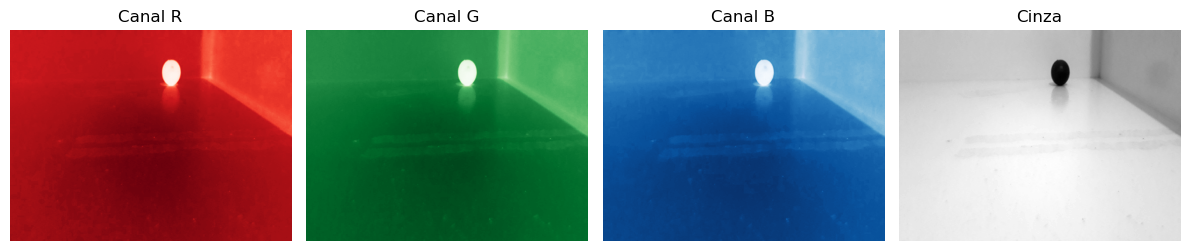

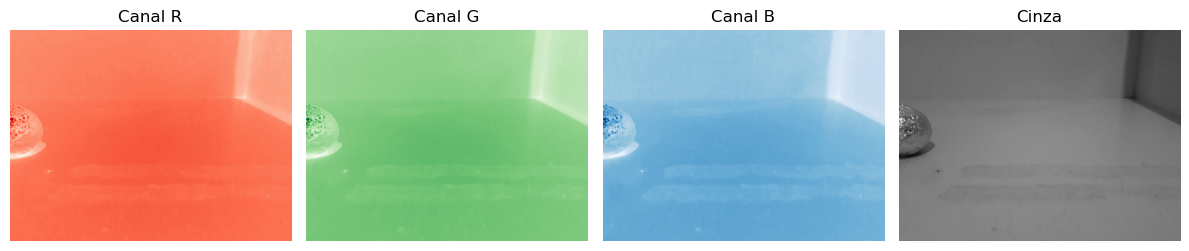

In [3]:
# --- 1. Ler a imagem ---
vitima_morta_sample = 'resized-images/ComVitimaMorta/20201029_095407.jpg'
img_grey_1 = plot_image_channels(vitima_morta_sample)
vitima_viva_sample = 'resized-images/ComVitimaViva/20201028_151111.jpg'
img_grey_2 = plot_image_channels(vitima_viva_sample)

# --- 4. Flatten da imagem ---
# Usando escala de cinza como features (75x100 = 7500 valores)
#features = gray.flatten()

# Criar DataFrame (uma linha, 7500 colunas)
#df = pd.DataFrame([features])

#print(df.shape)   # deve ser (1, 7500)
#print(df.head())


#### Vamos iterar em cada pasta e criar o dataframe com as features

In [4]:

import glob
import os
# Caminho da pasta onde estão as imagens
folder_morta = "resized-images/ComVitimaMorta/"   # ajuste para o seu diretório

# Lista de arquivos .jpg
files = glob.glob(os.path.join(folder_morta, "*.jpg"))

# Lista para armazenar os vetores de cada imagem
data_list = []

for file in files:
    # --- 1. Ler a imagem ---
    img = cv2.imread(file)  # lê em BGR
    #img = cv2.resize(img, (640, 480))    # garante resolução compatível com treinamento

    # Converter para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --- 2. Flatten da imagem ---
    features = gray.flatten()

    # Adiciona ao dataset
    data_list.append(features)

# --- 3. Criar DataFrame ---
df_morta = pd.DataFrame(data_list)

print(f"Total de imagens lidas: {len(df_morta)}")
print(f"Formato do DataFrame: {df_morta.shape}")  # (n_imagens, 640x480)

Total de imagens lidas: 461
Formato do DataFrame: (461, 307200)


#### Adicionar RÓTULO 0 para Vítima MORTA

In [5]:
df_morta['y'] = 0

In [40]:
df_morta.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,y
0,133,134,134,134,134,135,134,134,133,134,...,152,152,151,151,151,151,151,150,150,0
1,134,135,136,137,137,137,136,136,137,137,...,153,153,152,152,152,152,152,152,152,0
2,137,135,134,134,135,136,136,135,135,135,...,151,150,150,150,150,150,150,149,149,0
3,140,141,141,141,141,141,141,141,142,142,...,158,158,157,157,158,157,157,157,157,0
4,160,160,160,160,160,161,161,160,160,160,...,174,175,175,175,175,175,175,176,176,0


In [6]:
df_morta.shape

(461, 307201)

In [7]:
# Caminho da pasta onde estão as imagens
folder_viva = "resized-images/ComVitimaViva/"   # ajuste para o seu diretório

# Lista de arquivos .jpg
files = glob.glob(os.path.join(folder_viva, "*.jpg"))

# Lista para armazenar os vetores de cada imagem
data_list = []

for file in files:
    # --- 1. Ler a imagem ---
    img = cv2.imread(file)  # lê em BGR
    #img = cv2.resize(img, (100, 75))    # garante 100x75

    # Converter para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --- 2. Flatten da imagem ---
    features = gray.flatten()

    # Adiciona ao dataset
    data_list.append(features)

# --- 3. Criar DataFrame ---
df_viva = pd.DataFrame(data_list)

print(f"Total de imagens lidas: {len(df_viva)}")
print(f"Formato do DataFrame: {df_viva.shape}")  # (n_imagens, 7500)

Total de imagens lidas: 461
Formato do DataFrame: (461, 307200)


In [8]:
df_viva['y'] = 1

In [9]:
df_viva.shape

(461, 307201)

In [31]:
# Caminho da pasta onde estão as imagens
folder_sem = "resized-images/SemVitima/"   # ajuste para o seu diretório

# Lista de arquivos .jpg
files = glob.glob(os.path.join(folder_sem, "*.jpg"))

# Lista para armazenar os vetores de cada imagem
data_list = []

for file in files:
    # --- 1. Ler a imagem ---
    img = cv2.imread(file)  # lê em BGR
    #img = cv2.resize(img, (100, 75))    # garante 100x75

    # Converter para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # --- 2. Flatten da imagem ---
    features = gray.flatten()

    # Adiciona ao dataset
    data_list.append(features)

# --- 3. Criar DataFrame ---
df_sem = pd.DataFrame(data_list)

print(f"Total de imagens lidas: {len(df_sem)}")
print(f"Formato do DataFrame: {df_sem.shape}")  # (n_imagens, 7500)

Total de imagens lidas: 462
Formato do DataFrame: (462, 7500)


In [33]:
df_sem['y'] = 3

In [43]:
df_sem.shape

(462, 7501)

In [34]:
df_sem.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,y
0,136,135,134,134,135,136,135,135,135,135,...,156,155,155,155,155,155,155,155,155,3
1,133,133,133,134,135,135,135,134,135,135,...,156,155,155,154,155,155,155,154,154,3
2,135,136,136,136,136,135,136,136,136,136,...,156,156,156,156,156,156,156,156,156,3
3,134,133,133,133,134,135,135,135,134,135,...,155,154,154,154,155,154,155,155,154,3
4,134,134,135,135,135,136,136,136,135,136,...,156,156,156,156,156,155,155,154,154,3


#### Unido os três dataframes

In [10]:
#df_final = pd.concat([df_morta, df_viva, df_sem], ignore_index=True)
df_final = pd.concat([df_morta, df_viva], ignore_index=True)

print(df_final.shape)
print(df_final.head())

(922, 307201)
     0    1    2    3    4    5    6    7    8    9  ...  307191  307192  \
0  132  132  132  133  133  134  134  134  134  134  ...     150     149   
1  134  134  134  134  134  134  134  134  134  135  ...     152     153   
2  138  138  137  136  135  135  136  137  137  138  ...     149     148   
3  143  143  142  141  141  140  141  141  140  140  ...     157     157   
4  162  162  161  161  160  160  160  159  158  158  ...     177     175   

   307193  307194  307195  307196  307197  307198  307199  y  
0     150     150     150     150     150     151     151  0  
1     153     152     152     152     152     152     152  0  
2     149     149     149     149     149     149     150  0  
3     156     156     156     156     157     157     158  0  
4     176     176     176     176     176     175     175  0  

[5 rows x 307201 columns]


In [12]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,307191,307192,307193,307194,307195,307196,307197,307198,307199,y
0,132,132,132,133,133,134,134,134,134,134,...,150,149,150,150,150,150,150,151,151,0
1,134,134,134,134,134,134,134,134,134,135,...,152,153,153,152,152,152,152,152,152,0
2,138,138,137,136,135,135,136,137,137,138,...,149,148,149,149,149,149,149,149,150,0
3,143,143,142,141,141,140,141,141,140,140,...,157,157,156,156,156,156,157,157,158,0
4,162,162,161,161,160,160,160,159,158,158,...,177,175,176,176,176,176,176,175,175,0


In [11]:
df_final.to_csv('imageset_gray_bin_640_480.csv', index=False)